In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings ("ignore")



In [43]:
train_d = pd.read_csv("../../Dados/treino.csv")

In [32]:
train_d

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0


In [44]:
train_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [45]:
train_d['Crop_Damage'].value_counts()

Crop_Damage
0    74238
1    12307
2     2313
Name: count, dtype: int64

Crop_Damage
0    74238
1    12307
2     2313
Name: count, dtype: int64


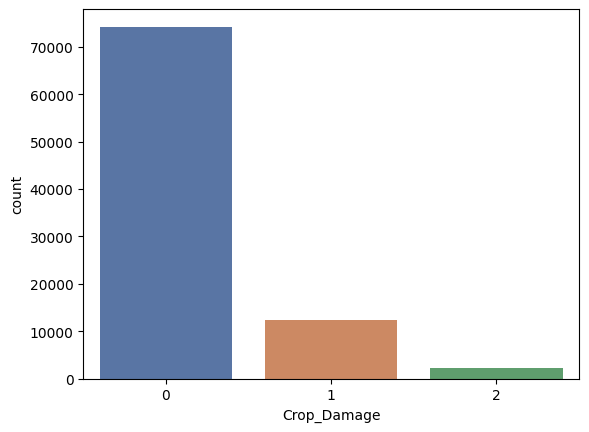

In [73]:
print (train_d['Crop_Damage'].value_counts().sort_index())
# codes colors = deep , muted , pastel, dark , bright, colorblind
ax = sns.countplot(x=train_d['Crop_Damage'], palette='deep')

Pesticide_Use_Category
1      837
2    63709
3    24312
Name: count, dtype: int64


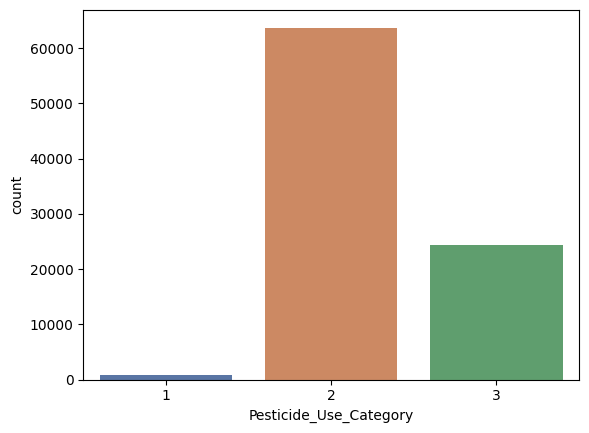

In [72]:
print (train_d['Pesticide_Use_Category'].value_counts().sort_index())
ax = sns.countplot(x=train_d['Pesticide_Use_Category'],palette='deep')

Season
1    26902
2    44210
3    17746
Name: count, dtype: int64


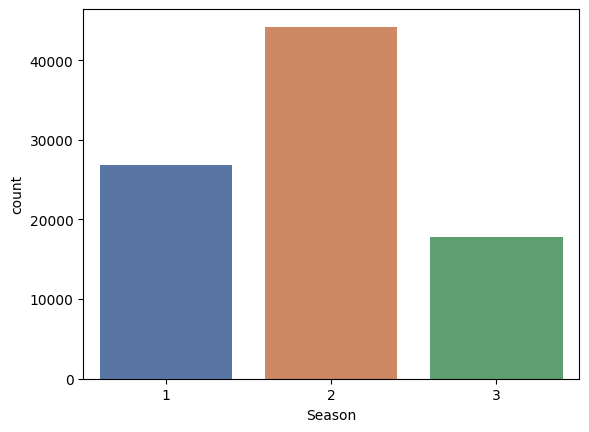

In [74]:
print (train_d['Season'].value_counts().sort_index())
ax = sns.countplot(x=train_d['Season'], palette='deep')

Crop_Type
0    63589
1    25269
Name: count, dtype: int64


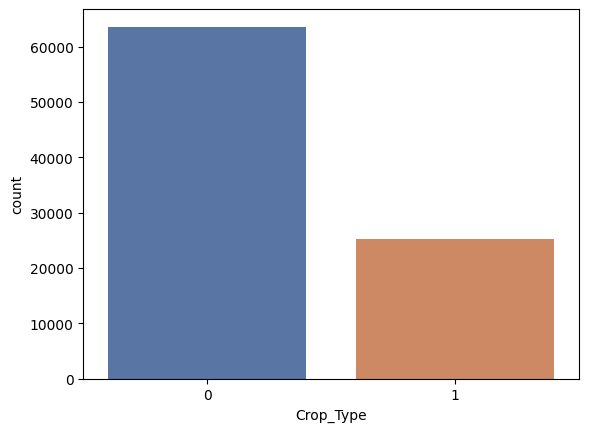

In [76]:
print (train_d['Crop_Type'].value_counts().sort_index())
ax = sns.countplot(x=train_d['Crop_Type'],palette='deep')

Soil_Type
0    48124
1    40734
Name: count, dtype: int64


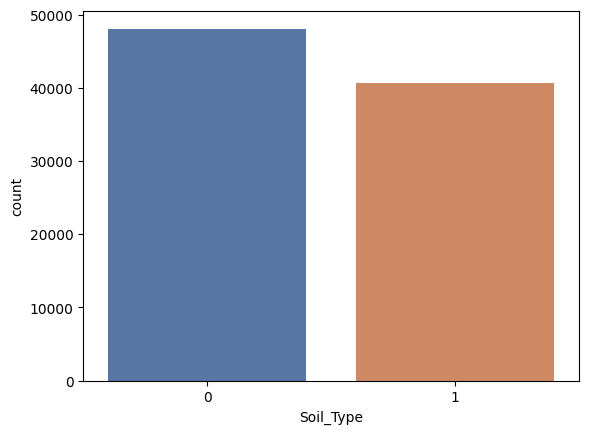

In [77]:
print (train_d['Soil_Type'].value_counts().sort_index())
ax = sns.countplot(x=train_d['Soil_Type'],palette='deep')

In [79]:
train_d.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [80]:
train_d.duplicated().sum()

0

count    88858.000000
mean      1399.012210
std        849.048781
min        150.000000
25%        731.000000
50%       1212.000000
75%       1898.000000
max       4097.000000
Name: Estimated_Insects_Count, dtype: float64


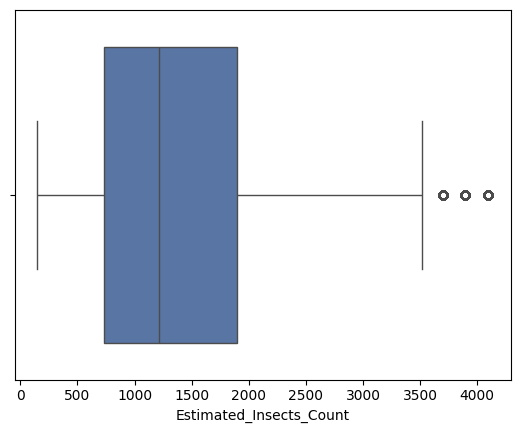

In [85]:
print (train_d['Estimated_Insects_Count'].describe())
ax = sns.boxplot(x=train_d['Estimated_Insects_Count'])

count    79858.000000
mean        28.623970
std         12.391881
min          0.000000
25%         20.000000
50%         28.000000
75%         37.000000
max         67.000000
Name: Number_Weeks_Used, dtype: float64


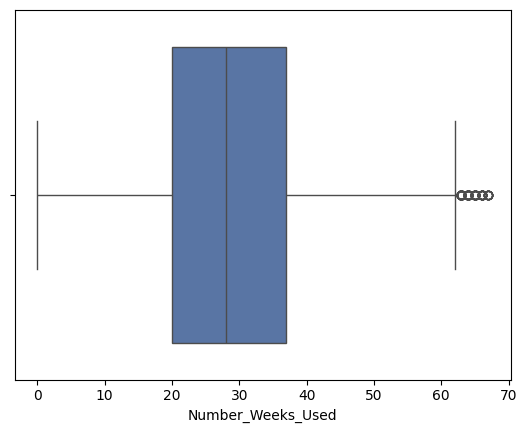

In [84]:
print (train_d['Number_Weeks_Used'].describe())
ax = sns.boxplot(x=train_d['Number_Weeks_Used'])

count    88858.000000
mean         9.589986
std          9.900631
min          0.000000
25%          0.000000
50%          7.000000
75%         16.000000
max         50.000000
Name: Number_Weeks_Quit, dtype: float64


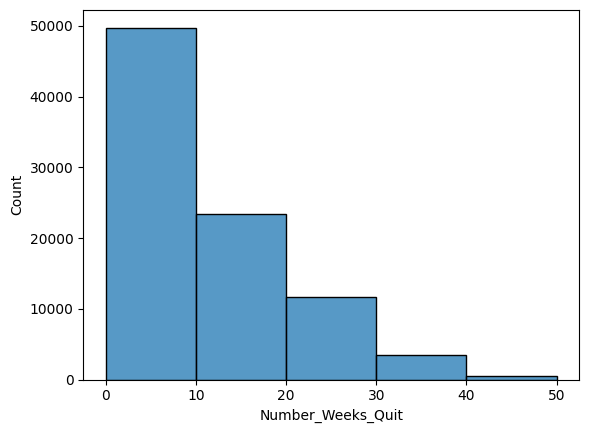

In [86]:
print (train_d['Number_Weeks_Quit'].describe())
ax = sns.histplot(x=train_d['Number_Weeks_Quit'],bins=5)

In [87]:
train_d.drop ('ID', axis=1,inplace=True)
train_d.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [88]:
train_d.dropna(inplace=True)

In [90]:
train_d.isna().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [94]:
train_d

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...
88853,3337,1,0,2,10,12.0,44,3,0
88854,3516,1,0,2,10,20.0,38,1,0
88855,3516,1,0,2,15,40.0,8,2,0
88856,3702,1,0,2,10,25.0,18,3,0


In [96]:
for col in ['Crop_Type','Soil_Type','Pesticide_Use_Category','Season']:
    train_d = pd.get_dummies(train_d,columns=[col])

In [97]:
train_d.shape

(79858, 15)

In [98]:
X = train_d.drop(['Crop_Damage'],axis=1)
y = train_d['Crop_Damage'].values.reshape(-1,1)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=7)